In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [22]:
df = pd.read_csv(r"C:\Users\ASUS\Desktop\practical be\dataset\boston_housing.csv")
X = df.loc[:, df.columns != 'MEDV']
y = df.loc[:, df.columns == 'MEDV']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)
df


,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [23]:
mms = MinMaxScaler()
mms.fit(X_train)
X_train = mms.transform(X_train)
X_test = mms.transform(X_test)

In [34]:
model = Sequential()
model.add(Dense(256, input_shape=(13, ), activation='relu', name='dense_1'))
model.add(Dense(128, activation='relu', name='dense_2'))
model.add(Dense(64, activation='relu', name='dense_3'))
model.add(Dense(1, activation='linear', name='dense_output'))
model.compile(optimizer='adam', loss='mse', metrics=['mse'])
model.summary()

C:\Users\ASUS\anaconda3\envs\practical\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_1 (Dense)                 │ (None, 256)            │         3,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_output (Dense)            │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 44,801 (175.00 KB)

 Trainable params: 44,801 (175.00 KB)

 Non-trainable params: 0 (0.00 B)

In [35]:
history = model.fit(X_train, y_train, epochs=100, validation_split=0.05, verbose = 1)

Epoch 1/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 580.4441 - mse: 580.4441 - val_loss: 526.0808 - val_mse: 526.0808
Epoch 2/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 445.5308 - mse: 445.5308 - val_loss: 289.4720 - val_mse: 289.4720
Epoch 3/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 211.0029 - mse: 211.0029 - val_loss: 131.1754 - val_mse: 131.1754
Epoch 4/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 138.2385 - mse: 138.2385 - val_loss: 105.4627 - val_mse: 105.4627
Epoch 5/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 92.5468 - mse: 92.5468 - val_loss: 94.4812 - val_mse: 94.4812
Epoch 6/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 72.1869 - mse: 72.1869 - val_loss: 76.4125 - val_mse: 76.4125
Epoch 7/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 58.7574 - mse: 58.7574 - val_loss: 70.4199 - val_mse: 70.4199
Epoch 8/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 51.5534 - mse: 51.5534 - val_loss: 65.3213 - val_mse: 65.3213
Epoch 9/100
11/

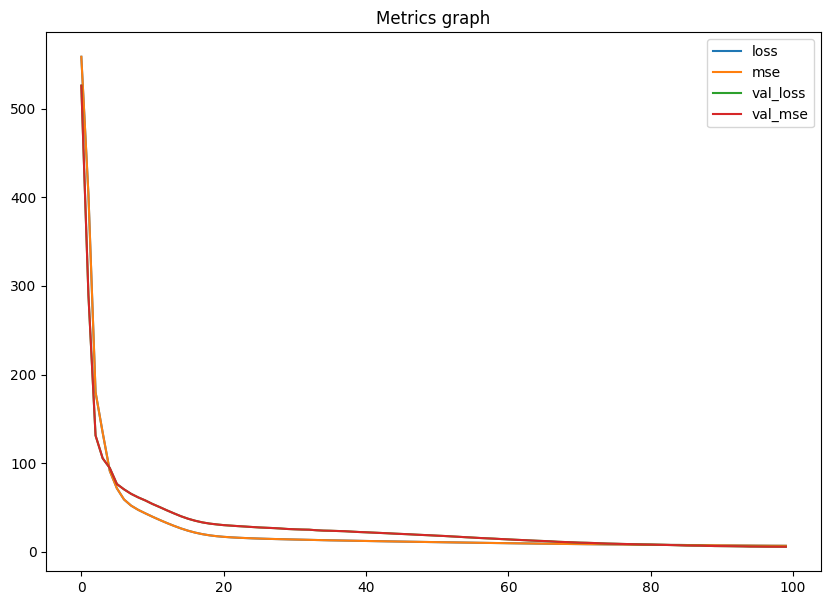

In [36]:
pd.DataFrame(history.history).plot(figsize=(10,7))
plt.title("Metrics graph")
plt.show()

In [37]:
mse_nn, mae_nn = model.evaluate(X_test, y_test)
print('Mean squared error on test data: ', mse_nn)
print('Mean absolute error on test data: ', mae_nn)

rmse_nn = np.sqrt(mse_nn)
print('Root Mean Squared Error on test data: ', rmse_nn)

r2_nn = r2_score(y_test, model.predict(X_test))
print('R-squared on test data: ', r2_nn)


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 24.3221 - mse: 24.3221 
Mean squared error on test data:  16.13458251953125
Mean absolute error on test data:  16.13458251953125
Root Mean Squared Error on test data:  4.016787587056509
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
R-squared on test data:  0.8003839254379272


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 


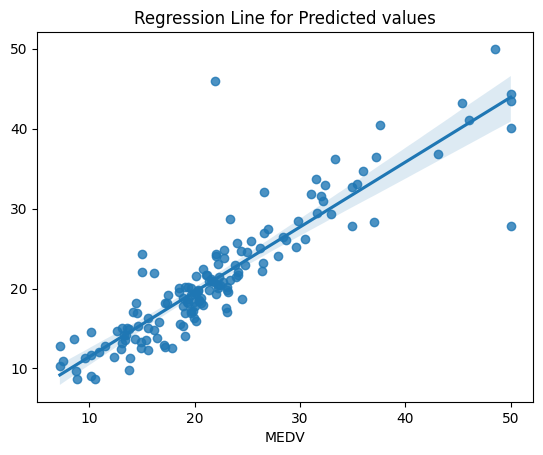

In [38]:
sns.regplot(x=y_test, y=model.predict(X_test))
plt.title("Regression Line for Predicted values")
plt.show()